## DataSet Exploration PASTIS

Import necessary packages

In [1]:
import pandas as pd
import numpy as np
import os 
import random
import matplotlib.pyplot as plt
from typing import List
import matplotlib.ticker as ticker

Create a list of all the files that are in the PATIS folder.

There's three subdirectories:
- Annotations
- Sentinel Data
- Instance Annotations



In [2]:
path = './data/PASTIS/'

# Find all files in the subdirectories
annotations_path = os.path.join(path, 'ANNOTATIONS')
data_s2_path = os.path.join(path, 'DATA_S2')
instance_path = os.path.join(path, 'INSTANCE_ANNOTATIONS')

# Create relative paths for each file
annotations = [os.path.join(annotations_path, f) for f in os.listdir(annotations_path) if f.endswith('npy')]
data_s2 = [os.path.join(data_s2_path, f) for f in os.listdir(data_s2_path) if f.endswith('npy')]
instance_annotations = [os.path.join(instance_path, f) for f in os.listdir(instance_path) if f.endswith('npy')]

# Create a dictionary with the file identifiers as keys and the paths as values
annotations = {p.split('_')[-1][:-4]: p for p in annotations}
data_s2 = {p.split('_')[-1][:-4]: p for p in data_s2}
instance_annotations = {p.split('_')[-1][:-4]: p for p in instance_annotations}

In [3]:
an_len, dat_len, in_len = len(annotations), len(data_s2), len(instance_annotations)
print(f"Number of annotations:\t\t{an_len}\nNumber of sentinel data:\t{dat_len}\nNumber of instc. annotations:\t{in_len}")

Number of annotations:		2433
Number of sentinel data:	2468
Number of instc. annotations:	2433


Now we combine all the file paths in a dictionary, based on their ID. 

In [4]:
all_files = {}

data_paths = [annotations, data_s2, instance_annotations]

for data in data_paths:
    for k, v in data.items():
        if k in all_files:
            all_files[k].append(v)
        else:
            all_files[k] = [v]

print(f"The combined files results in a dictionary of length: {len(all_files)}")

The combined files results in a dictionary of length: 2468


In [5]:
_missing = len([(k, v) for k, v in all_files.items() if len(v) < 3])
all_files = dict([(k, v) for k,v in all_files.items() if len(v) == 3])
print(f"There are {_missing} patches with less than 3 files")

There are 35 patches with less than 3 files


In [6]:
def load_patch(patch_paths: list):
    """
    Loads a patch from a list of paths
    """
    patch = []
    for path in patch_paths:
        patch.append(np.load(path))
    return patch

In [7]:
def random_test_patch(all_files: list):
    _tp = random.choice(list(all_files.items()))
    _tp_load = load_patch(_tp[1])
    return (_tp_load, _tp[0])

test_patch = random_test_patch(all_files)
test_patch[0][0].shape, test_patch[0][1].shape, test_patch[0][2].shape, test_patch[1]

((128, 128), (61, 10, 128, 128), (128, 128), '20405')

In [8]:
def plot_patch(full_patch: tuple):
    """
    Plots a patch
    """
    patch = full_patch[0].copy()

    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    fig.suptitle(f"Patch {full_patch[1]}")

    axs[0].set_title('Annotations')
    axs[0].imshow(np.transpose(np.moveaxis(patch[0], 0, -1)))

    rand_time = random.randint(0, patch[1].shape[0]-1)
    rand_spec = random.randint(0, patch[1].shape[1]-1)
    axs[1].set_title('Sentinel-2')
    axs[1].imshow(patch[1][rand_time, rand_spec, :, :], cmap='gray')

    axs[2].set_title('Instance annotations')
    axs[2].imshow(patch[2])

In [9]:
label_names = {
    0: "Background",
    1: "Meadow",
    2: "Soft winter wheat",
    3: "Corn",
    4: "Winter barley",
    5: "Winter rapeseed",
    6: "Spring barley",
    7: "Sunflower",
    8: "Grapevine",
    9: "Beet",
    10: "Winter triticale",
    11: "Winter durum wheat",
    12: "Fruits, vegetables, flowers",
    13: "Potatoes",
    14: "Leguminous fodder",
    15: "Soybeans",
    16: "Orchard",
    17: "Mixed cereal",
    18: "Sorghum",
    19: "Void label"
} 

In [14]:
def plot_patch_with_labels(patch: np.ndarray, figsize:tuple):

    if patch.shape[0] == 3:
        patch = np.moveaxis(patch[0], 0, -1)

    num_unique = 19

    cols = int(np.ceil(np.sqrt(num_unique)))
    rows = num_unique // cols + 1

    fig, axs = plt.subplots(rows, cols, figsize=figsize)

    for i in range(cols*rows):
        c, r = i // cols, i % cols
        if i >= num_unique:
            axs[c, r].set_visible(False)
            continue
        
        _t = patch.copy()
        _t[_t != i] = _t[_t != i] / 10
        _t[_t == i] = 255
        axs[c, r].xaxis.set_major_locator(ticker.NullLocator())
        axs[c, r].yaxis.set_major_locator(ticker.NullLocator())
        axs[c, r].set_title(label_names[i])
        axs[c, r].imshow(_t)
        

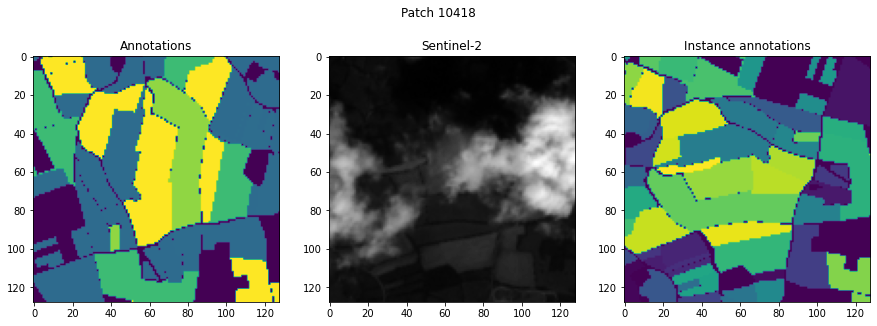

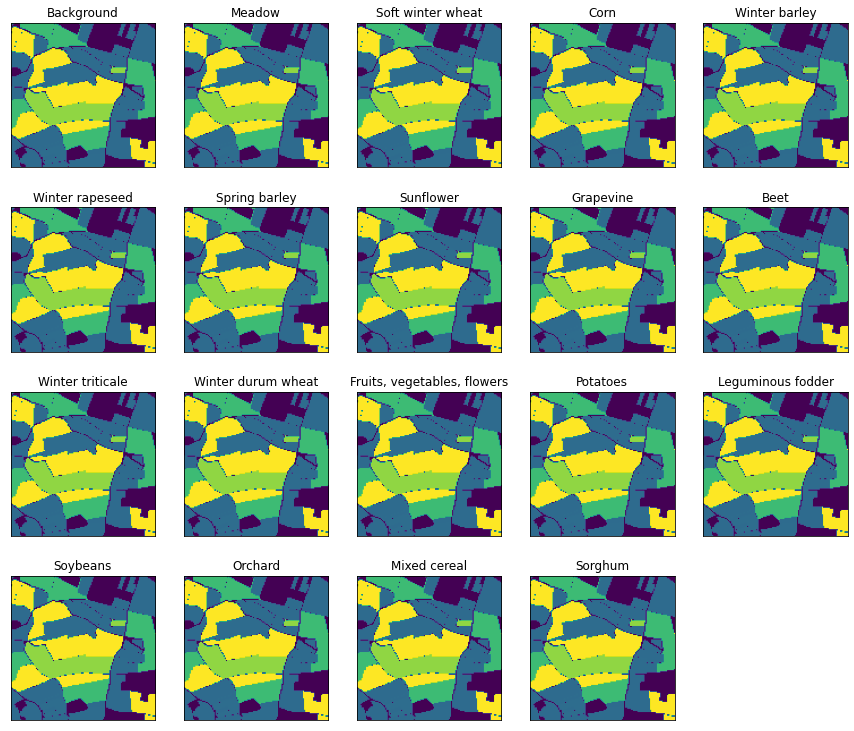

In [17]:
another = random_test_patch(all_files)
plot_patch(another)
plot_patch_with_labels(another[0][0], figsize=(15, 13))